In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model


In [2]:
X_train,X_test,Y_train, Y_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

lab_data = rgb2lab(Y_train)
print (lab_data.shape) 
lab_data,mean_dat,std_dat = normalise_train(lab_data)

0
(3908, 64, 64, 1)
(977, 64, 64, 1)
(3908, 64, 64, 3)
(977, 64, 64, 3)
(3908, 64, 64, 3)


(3908, 64, 64, 1)
(64, 64, 1)
(64, 64, 1)


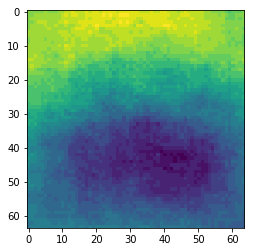

(977, 64, 64, 1)
(3908, 64, 64, 1)


In [3]:
X_train,mean_image,std_image = normalise_train(X_train)
print (X_train.shape)
print (mean_image.shape)
print (std_image.shape)
plt.imshow(mean_image[:,:,0].astype('uint8'))
plt.show()
X_test = normalise_test(X_test,mean_image,std_image)
print(X_test.shape)
print (X_train.shape)

In [16]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)

with tf.variable_scope("model") as scope:
    y_out = complex_pokemon_model(X)
    loss = tf.sqrt(tf.nn.l2_loss(y_out-Y))
    optimiser = tf.train.AdamOptimizer(1e-4)
    train_step = optimiser.minimize(loss)

    scope.reuse_variables()
    test_model = complex_pokemon_model(X,False)
    loss_test = tf.sqrt(tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 32
def train_epoch(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:   (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:True}
        losses,_ = sess.run([loss,train_step],feed_dict)
        if(i%5==0):
            print (losses)

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 10
for i in range(num_epochs):
    train_epoch(X_train, Y_train)
    val_result(X_test, Y_test)

    



58762.1
51912.4
50740.0
[53079.75]
58672.3
51880.9
50720.4
[53063.273]
58656.4
51868.5
50707.9
[53053.137]
58645.9
51858.4
50700.2
[53044.531]
58636.4
51852.1
50693.2
[53036.445]
58629.5
51847.6
50686.9
[53030.137]
58626.0
51841.8
50683.3
[53025.23]
58621.7
51839.5
50678.7
[53021.449]
58620.2
51837.0
50673.8
[53018.461]
58617.2
51834.3
50671.2
[53016.098]


(10, 64, 64, 1)
(10, 64, 64, 1)
34289.7
(10, 64, 64, 3)


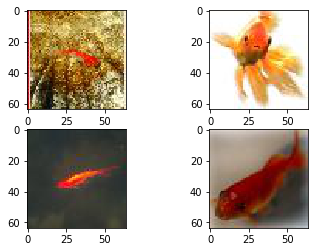

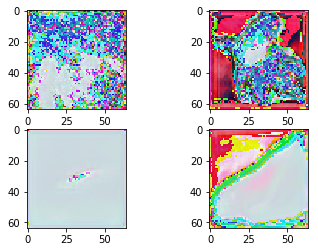

In [17]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(400,10)
sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
print (sample_images.shape)
grayed_sample_images = (sample_images)
print (grayed_sample_images.shape)

feed_dict = {X:grayed_sample_images[:,:,:],Y:samp,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images[0],cmap = plt.get_cmap('gray'))
        plt.subplot(222)
        plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        plt.subplot(223)
        plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        plt.subplot(224)
        plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images[0]);
        plt.subplot(222)
        plt.imshow(images[1])
        plt.subplot(223)
        plt.imshow(images[2])
        plt.subplot(224)
        plt.imshow(images[3])

    plt.show()
    
    
show_images((samp))
#show_images(grayed_sample_images,gray = True)
show_images((model_generated_images[0]) )

    

In [3]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,2])
is_training = tf.placeholder(tf.bool)

X_train = lab_data[...,0:1]
Y_train = lab_data[...,1:3]
print (X_train.shape)
print (Y_train.shape)

with tf.variable_scope("model") as scope:
    y_out = simpler_model(X)
    loss = tf.sqrt(tf.reduce_mean(tf.square(y_out-Y)))
    optimiser = tf.train.AdamOptimizer(1e-1)
    train_step = optimiser.minimize(loss)

    scope.reuse_variables()
    test_model = simpler_model(X,False)
    loss_test = tf.sqrt(tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 64
def train_epoch(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:   (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:True}
        losses,_ = sess.run([loss,train_step],feed_dict)
        if(i%5==0):
            print (losses)

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 5
for i in range(num_epochs):
    train_epoch(X_train, Y_train)
    print ("Next Epoch")
    #val_result(X_test, Y_test)

    


(3908, 64, 64, 1)
(3908, 64, 64, 2)
1.309
1.00267
1.03848
1.072
0.947487
1.10537
1.16886
0.986122
1.03855
0.977725
0.91101
0.865657
0.881051
Next Epoch
1.06819
0.977272
1.02127
1.05783
0.940403
1.08927
1.16147
0.975714
1.03023
0.970892
0.9025
0.871861
0.867924
Next Epoch
1.0602
0.973245
1.01179
1.05081
0.937899
1.0858
1.15561
0.973335
1.02516
0.965151
0.895608
0.879841
0.868456
Next Epoch
1.05599
0.973259
1.01055
1.04851
0.937395
1.08569
1.15402
0.973517
1.02663
0.965239
0.897852
0.872937
0.8617
Next Epoch
1.05594
0.971032
1.01016
1.04768
0.93713
1.08413
1.15265
0.972451
1.02537
0.968571
0.898363
0.86871
0.853356
Next Epoch


(10, 64, 64, 1)
(10, 64, 64, 2)
(10, 64, 64, 3)
167.871
(10, 64, 64, 2)


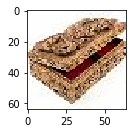

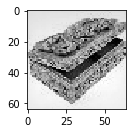

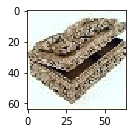

In [13]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(400,10)
sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
original_data = lab_data[rand_indices]
print (sample_images.shape)
print (samp.shape)
print (original_data.shape)

feed_dict = {X:sample_images,Y:samp,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images,cmap = plt.get_cmap('gray'))
        #plt.subplot(222)
        #plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        #plt.subplot(223)
        #plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        #plt.subplot(224)
        #plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images);
        #plt.subplot(222)
        #plt.imshow(images[1])
        #plt.subplot(223)
        #plt.imshow(images[2])
        #plt.subplot(224)
        #plt.imshow(images[3])

    plt.show()
    
show_images(lab2rgb(original_data[0,:,:,:]*std_dat + mean_dat) )
original_data[...,1:3] = model_generated_images[0]
show_images(original_data[0,:,:,0],gray = True)
show_images(lab2rgb(original_data[0,:,:,:]*std_dat + mean_dat))

    